# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


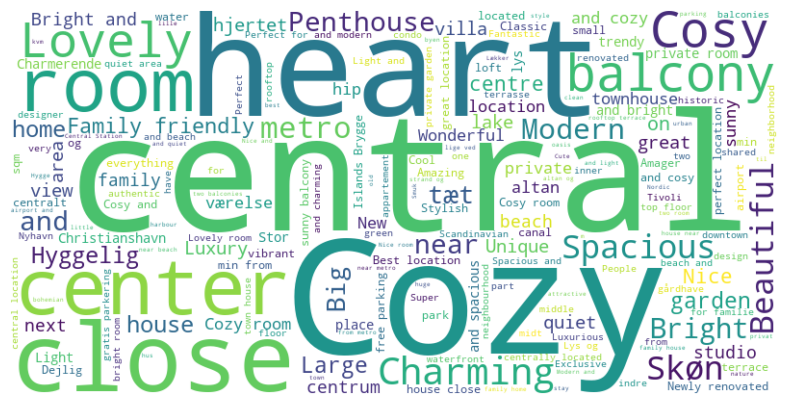

In [1]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace(r'[$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud imagel
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

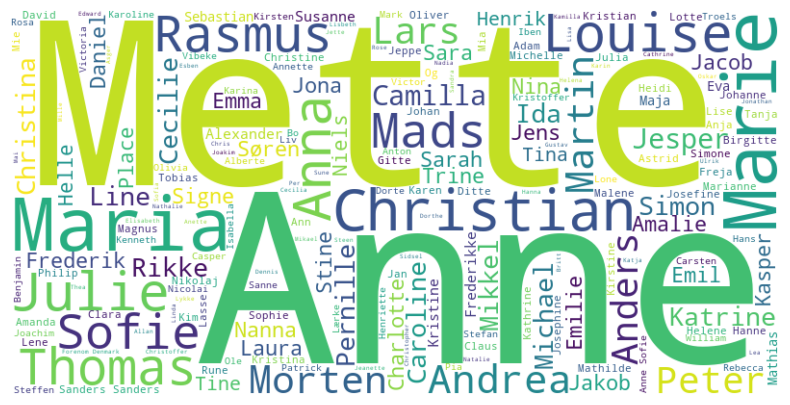

In [2]:
# Get the boolean mask for the rows that contain the stop words
stop_words_host_names = data_filtered['host_name'].str.contains('Apartment|House|Host|Rental|Company|Properties|Suites')

# Filltered out the rows that contain the stop words
data_filtered_host_names = data_filtered[~stop_words_host_names]

# Convert the 'host_name' column to a single string
text_host_names = ' '.join(data_filtered_host_names['host_name'].astype(str))

# Create and generate a word cloud image
wordcloud_host_names = WordCloud(background_color="white", width=800, height=400).generate(text_host_names)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_host_names, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [3]:
import plotly.express as px

fig = px.scatter_mapbox(data_filtered, lat="latitude", lon="longitude", zoom=8, height=800, width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

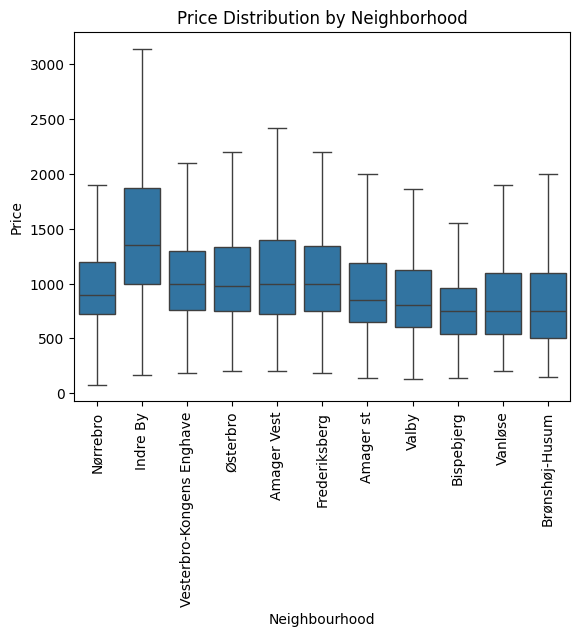

In [4]:
import seaborn as sns

sns.boxplot(x=data_filtered['neighbourhood_cleansed'], y=data_filtered['price'], showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price Distribution by Neighborhood')
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [5]:
# Filter the data to include only the relevant columns
data_filtered_analysis = data_filtered[['neighbourhood_cleansed', 'room_type', 'price']]

# Group by neighborhood and room type
grouped_data = data_filtered_analysis.groupby(['neighbourhood_cleansed', 'room_type'])

# Calculate the mode for price
grouped_data_with_mode = grouped_data['price'].apply(lambda x: x.mode())

# Display the mode for price
display(grouped_data_with_mode)

# Descriptive statistics for price
grouped_data_with_description = grouped_data['price'].describe()

# Round the descriptive statistics to 2 decimal places
grouped_data_with_description_rounded = grouped_data_with_description.round(2)

# Display the descriptive statistics for price
display(grouped_data_with_description_rounded)

neighbourhood_cleansed     room_type         
Amager Vest                Entire home/apt  0    1000.0
                           Private room     0     500.0
                           Shared room      0     972.0
                                            1    1131.0
Amager st                  Entire home/apt  0    1000.0
                           Hotel room       0    1149.0
                                            1    1201.0
                                            2    1538.0
                           Private room     0     450.0
                           Shared room      0    2575.0
Bispebjerg                 Entire home/apt  0     700.0
                           Private room     0     300.0
                           Shared room      0     198.0
Brønshøj-Husum             Entire home/apt  0    1400.0
                           Private room     0     500.0
                           Shared room      0     200.0
                                            1     223.0
Fr

count     mean      std     min  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  1234.23   832.70   250.0   
                          Private room      148.0  1032.97  5299.02   200.0   
                          Shared room         2.0  1051.50   112.43   972.0   
Amager st                 Entire home/apt   791.0  1093.58   721.98   240.0   
                          Hotel room          3.0  1296.00   211.18  1149.0   
                          Private room      129.0   549.33   294.00   135.0   
                          Shared room         1.0  2575.00      NaN  2575.0   
Bispebjerg                Entire home/apt   508.0   992.59  1981.58   235.0   
                          Private room       95.0   488.98   353.67   143.0   
                          Shared room         1.0   198.00      NaN   198.0   
Brønshøj-Husum            Entire home/apt   216.0  1015.00   555.67   250.0   
                          Private room       67.0   445.55   201.63   145.0   
                          Shared room         2.0   211.50    16.26   200.0   
Frederiksberg             Entire home/apt  1044.0  1292.47  1958.80   300.0   
                          Private room      133.0   621.71   567.61   185.0   
Indre By                  Entire home/apt  1702.0  1642.39  1072.62   350.0   
                          Hotel room         10.0  1077.20   654.26   204.0   
                          Private room      128.0   698.98   380.07   165.0   
                          Shared room         4.0   292.00    67.58   223.0   
Nørrebro                  Entire home/apt  1889.0  1047.74   583.70   216.0   
                          Private room      165.0   650.12   760.27    79.0   
                          Shared room         3.0   324.67   130.48   174.0   
Valby                     Entire home/apt   450.0  1017.97   635.43   303.0   
                          Private room       89.0   498.16   288.62   127.0   
Vanløse                   Entire home/apt   254.0   954.43   496.66   269.0   
                          Private room       44.0   413.41   194.58   200.0   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  1181.44   698.12   300.0   
                          Private room      221.0   574.37   295.73   186.0   
                          Shared room         2.0   330.50   113.84   250.0   
Østerbro                  Entire home/apt  1174.0  1248.55  1438.91   268.0   
                          Private room      130.0   605.46   437.26   200.0   
                          Shared room         1.0   469.00      NaN   469.0   

                                               25%     50%      75%      max  
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   814.00  1050.0  1480.00  14000.0  
                          Private room      400.00   500.0   655.00  64900.0  
                          Shared room      1011.75  1051.5  1091.25   1131.0  
Amager st                 Entire home/apt   700.00   900.0  1200.00  10000.0  
                          Hotel room       1175.00  1201.0  1369.50   1538.0  
                          Private room      400.00   471.0   600.00   2000.0  
                          Shared room      2575.00  2575.0  2575.00   2575.0  
Bispebjerg                Entire home/apt   600.00   800.0  1000.00  44000.0  
                          Private room      300.00   400.0   528.50   3000.0  
                          Shared room       198.00   198.0   198.00    198.0  
Brønshøj-Husum            Entire home/apt   655.75   900.0  1250.00   4462.0  
                          Private room      320.00   400.0   500.00   1200.0  
                          Shared room       205.75   211.5   217.25    223.0  
Frederiksberg             Entire home/apt   822.50  1037.0  1400.00  58000.0  
                          Private room      400.00   500.0   700.00   5000.0  
Indre By      

### 5. Based on self-chosen features, develop a logistic regression mode and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Calculate the median review score
median_score = data_filtered['review_scores_value'].median()

# Create a new column 'review_score_category' with 1 for 'above average' and 0 for 'under average'
data_filtered['review_score_category'] = (data_filtered['review_scores_value'] > median_score).astype(int)

# Initialize the LabelEncoder (encoding categorical variables)
le = LabelEncoder()

# Apply LabelEncoder to the 'neighbourhood' column
data_filtered['neighbourhood_label'] = le.fit_transform(data_filtered['neighbourhood_cleansed'])

# Reset the LabelEncoder and apply it to the 'room_type' column
le = LabelEncoder()
data_filtered['room_type_label'] = le.fit_transform(data_filtered['room_type'])
display(data_filtered.head(5))

scaler = StandardScaler()
numeric_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                    'calculated_host_listings_count', 'availability_365']
data_filtered[numeric_features] = scaler.fit_transform(data_filtered[numeric_features])

# Splitting data into training and testing sets
X = data_filtered[['neighbourhood_label', 'room_type_label'] + numeric_features]
y = data_filtered['review_score_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Evaluating the model
train_accuracy_lr = log_reg.score(X_train, y_train)
test_accuracy_lr = log_reg.score(X_test, y_test)

print("Model accuracy on the training set - Logistic Regression: {:.2f}".format(train_accuracy_lr))
print("Model accuracy on the test set - Logistic Regression: {:.2f}".format(test_accuracy_lr))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Performance on the training set
train_accuracy_knn = knn.score(X_train, y_train)

# Performance on the training set
test_accuracy_knn = knn.score(X_test, y_test)

print("Model accuracy on the training set - kNN: {:.2f}".format(train_accuracy_knn))
print("Model accuracy on the test set - knn: {:.2f}".format(test_accuracy_knn))

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category,review_score_category,neighbourhood_label,room_type_label
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.89,4.73,4.71,1.08,1,0,0,0,6,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.86,4.94,4.81,0.55,1,303,1,1,5,0
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.70,4.89,4.59,2.06,3,56,1,0,5,0
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,5.00,4.87,4.80,0.16,1,59,0,1,9,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.80,4.53,0.13,1,0,1,0,9,0


Model accuracy on the training set - Logistic Regression: 0.57
Model accuracy on the test set - Logistic Regression: 0.57
Model accuracy on the training set - kNN: 0.77
Model accuracy on the test set - knn: 0.52
